In [83]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
import math
from neurodiffeq.monitors import Monitor1D
import IPython

In [84]:
alpha_0 = 1.0
alpha_1 = 2.0
c2 = alpha_0/(12*alpha_1)
c3 = 1.0 
c2

0.041666666666666664

Training Progress:   0%|                             | 0/100000 [00:00<?, ?it/s]

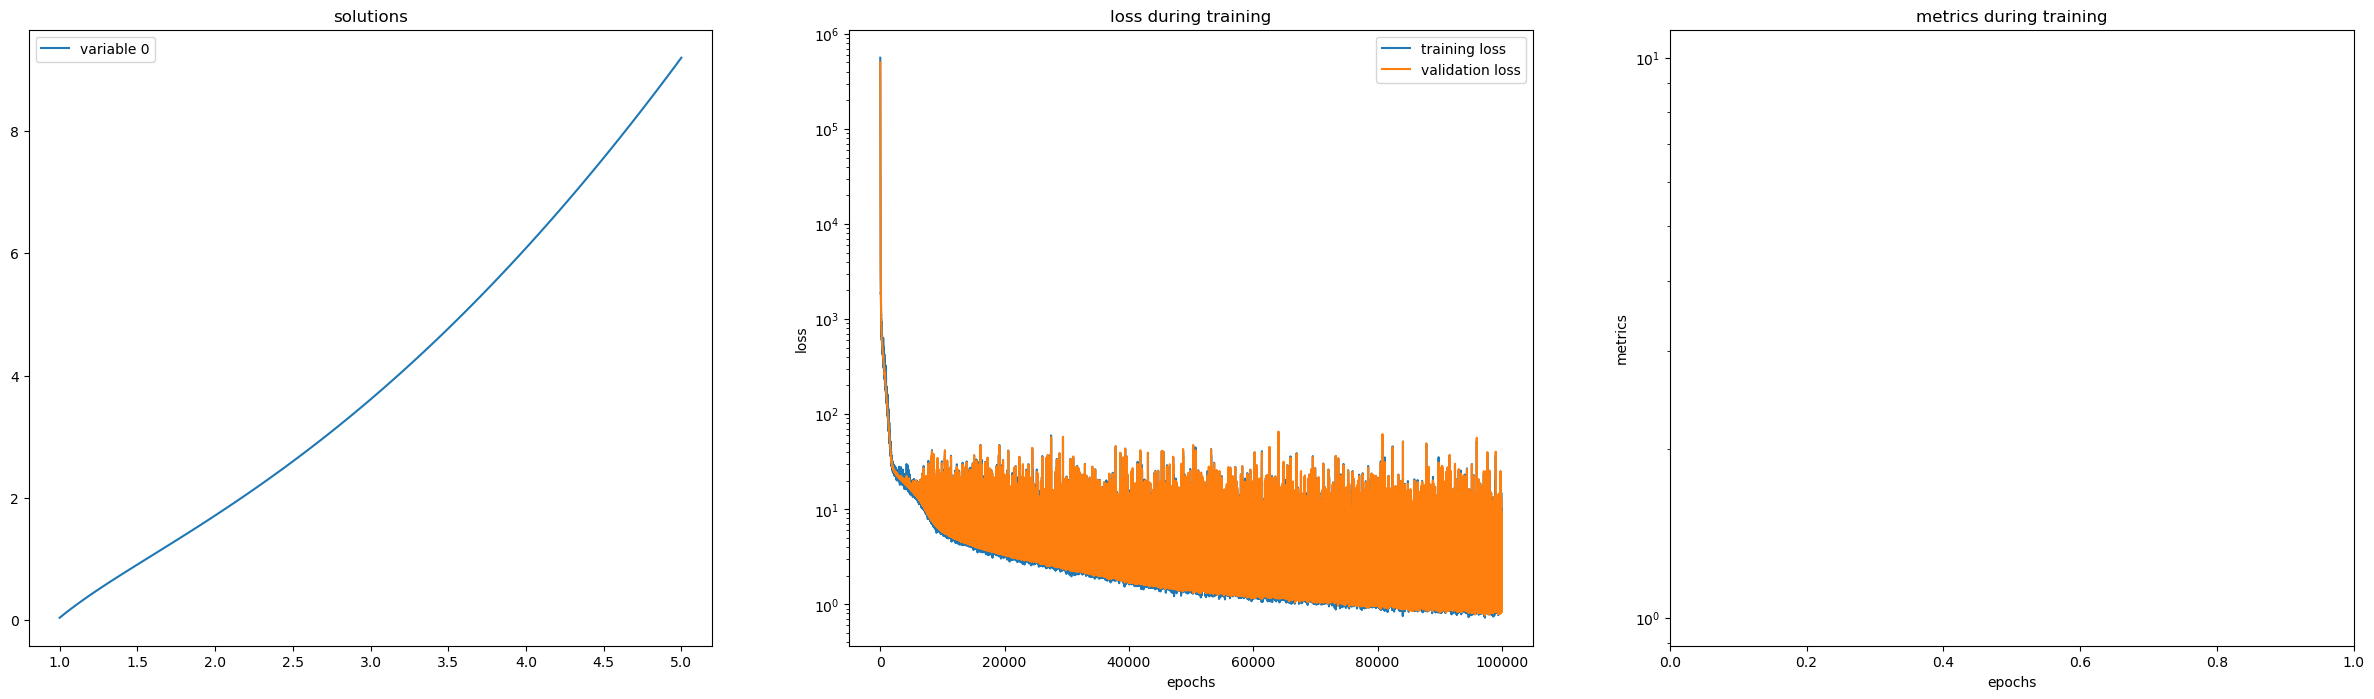

In [85]:
def ode_system(A, t):
    # return [2*torch.pow(t,2)*alpha_1*diff(A,t,order=2)*(1.5*t*diff(A,t)+3*A) - 2*t*diff(A,t)*(3*alpha_1*A-torch.pow(t,2)*alpha_0*0.5-3*alpha_1) - 2*A*(6*alpha_1*A+torch.pow(t,2)*alpha_0-6*alpha_1)]
    return [(1.5*alpha_1*torch.pow(t,2)*diff(A,t,order=2)-3*alpha_1*(A-1)+0.5*torch.pow(t,2)*alpha_0)*(t*diff(A,t)+2*A)-2*A*torch.pow(t,2)*alpha_0]

conditions = [IVP(t_0=1.0, u_0=1.0+c2-c3, u_0_prime=2*c2+2*c3)]

nets = [FCNN(actv=SinActv)]
monitor = Monitor1D(t_min=1.0, t_max=5.0, check_every=100000)
solver = Solver1D(ode_system, conditions, t_min=1.0, t_max=5.0, nets = nets)
solver.fit(max_epochs=100000, callbacks = [monitor.to_callback()])
solution = solver.get_solution()

In [89]:
t = np.linspace(1.0, 5.0, 100000)
A_nn = solution(t, to_numpy=True)

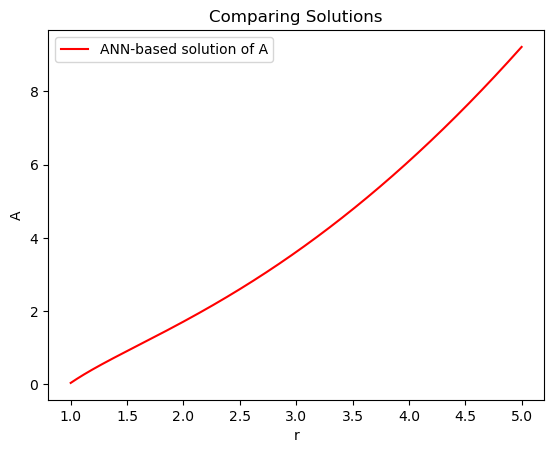

In [90]:
plt.title("Comparing Solutions")
plt.ylabel('A')
plt.xlabel('r')
plt.plot(t, A_nn, label='ANN-based solution of A', color = 'r')
# plt.plot(t, A_an,label='Analytical solution of A', color = 'b')
plt.legend()
plt.savefig('lambda')
plt.show()

In [91]:
N = 100000
t_start = 1.0
t_end = 5.0
t = np.linspace(t_start, t_end, N)
# t = np.linspace(t_end, t_start, N)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
    
# Initial conditions

alpha_0 = 2.0
alpha_1 = 1.0
c2 = alpha_0/(12*alpha_1)
c3 = 1.0
y0  = 1.0+c2-c3
u0  = 2*c2+2*c3
h   = t[1]-t[0]
print(h)

# Enter the definition of the set of ordinary differential equations
def ode(t,y,u):
  ode_1 = u
  ode_2 = (4*y*alpha_0)/(3*alpha_1*(t*u+2*y)) - alpha_0/(3*alpha_1) + (2*(y-1))/(t**2)
  return np.array([ode_1,ode_2])

# RK4
y = np.empty(N); u = np.empty(N)

# t[0] = t_initial
y[0] = y0; u[0] = u0

for i in range(0,N-1,1):

  k11 = h*ode(t[i],y[i],u[i])[0]
  k12 = h*ode(t[i],y[i],u[i])[1]

  k21 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[0]
  k22 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[1]

  k31 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[0]
  k32 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[1]

  k41 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[0]
  k42 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[1]

  y[i+1] = y[i] + ((k11+2*k21+2*k31+k41)/6)
  u[i+1] = u[i] + ((k12+2*k22+2*k32+k42)/6)
  # t[i+1] = t[i] + h

4.00004000040699e-05


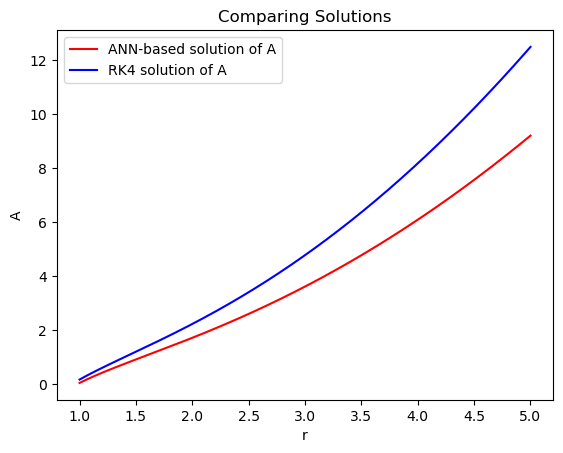

In [97]:
plt.title("Comparing Solutions")
plt.ylabel('A')
plt.xlabel('r')
plt.plot(t, A_nn, label='ANN-based solution of A', color = 'r')
plt.plot(t, y,label='RK4 solution of A', color = 'b')
# plt.axis([0.9, 1.1, 0.0, 0.3])
plt.legend()
plt.savefig('fR_NR_solution_2_2', dpi = 300)
plt.show()

In [93]:
lambda_error = np.sqrt(np.mean((A_nn-y)**2))
print("Mean square error in lambda is", lambda_error)

Mean square error in lambda is 1.6340369736753937


In [94]:
1.0+c2-c3

0.16666666666666674

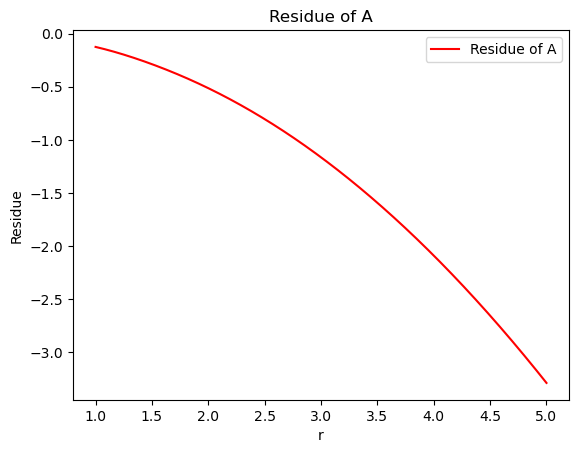

In [98]:
plt.title("Residue of A")
plt.ylabel('Residue')
plt.xlabel('r')
plt.plot(t, A_nn-y, label='Residue of A', color = 'r')
# plt.plot(t, y,label='RK4 solution of A', color = 'b')
# plt.axis([0.9, 1.1, 0.0, 0.3])
plt.legend()
plt.savefig('fR_NR_residue_2_2', dpi = 300)
plt.show()